In [101]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
df_loaded = pd.read_parquet('data.parquet')
df_loaded

,0-7,7-10,10-13,13-16,16-19,19-0,departure,arrival,travel_date,scanned_at,bahn_card
0,19.90,49.90,49.90,47.90,49.90,52.50,Porz-Wahn,Middelburg,2023-02-20,2023-02-19,0
1,19.90,47.90,47.90,47.90,47.90,52.50,Porz-Wahn,Middelburg,2023-02-21,2023-02-19,0
2,19.90,47.90,49.90,47.90,44.90,52.50,Porz-Wahn,Middelburg,2023-02-22,2023-02-19,0
3,19.90,37.90,37.90,47.90,37.90,52.50,Porz-Wahn,Middelburg,2023-02-23,2023-02-19,0
4,19.90,47.90,49.90,52.50,44.90,39.90,Porz-Wahn,Middelburg,2023-02-24,2023-02-19,0
...,...,...,...,...,...,...,...,...,...,...,...
3019,24.30,16.20,16.20,20.25,20.25,20.25,Middelburg,K%F6ln+Messe%2FDeutz,2023-03-18,2023-03-01,1
3020,42.25,31.65,31.65,40.60,24.30,30.80,Middelburg,K%F6ln+Messe%2FDeutz,2023-03-19,2023-03-01,1
3021,20.25,31.65,31.65,30.80,30.80,16.20,Middelburg,K%F6ln+Messe%2FDeutz,2023-03-20,2023-03-01,1
3022,16.20,16.20,16.20,24.30,24.30,16.20,Middelburg,K%F6ln+Messe%2FDeutz,2023-03-21,2023-03-01,1


In [102]:
cheapest_time_slots = df_loaded.iloc[:, :5].min()
cheapest_time_slots

0-7      16.2
7-10     16.2
10-13    16.2
13-16    16.2
16-19    16.2
dtype: float64

In [103]:
df_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   0-7          2964 non-null   float64       
 1   7-10         3024 non-null   float64       
 2   10-13        3024 non-null   float64       
 3   13-16        3024 non-null   float64       
 4   16-19        3024 non-null   float64       
 5   19-0         3024 non-null   float64       
 6   departure    3024 non-null   object        
 7   arrival      3024 non-null   object        
 8   travel_date  3024 non-null   datetime64[ns]
 9   scanned_at   3024 non-null   datetime64[ns]
 10  bahn_card    3024 non-null   int64         
dtypes: datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 260.0+ KB


In [135]:
today = pd.to_datetime(datetime.now().strftime('%Y-%m-%d'))
def get_start_date(date_string):
    if date_string:
        return pd.to_datetime(date_string)
    return today
end_date = pd.to_datetime('2023-03-12')
start_date = get_start_date(end_date)
print(start_date)
filtered_data = df_loaded.query('travel_date <= @end_date & travel_date >= @start_date & arrival == "Middelburg" & scanned_at >= @today')
filtered_data

2023-03-12 00:00:00


,0-7,7-10,10-13,13-16,16-19,19-0,departure,arrival,travel_date,scanned_at,bahn_card
2530,24.90,19.9,49.9,52.50,52.50,52.50,Porz-Wahn,Middelburg,2023-03-12,2023-03-01,0
2551,19.90,19.9,19.9,19.90,61.10,52.50,Porz%28Rhein%29,Middelburg,2023-03-12,2023-03-01,0
2572,24.90,19.9,49.9,52.50,52.50,52.50,Urbach+Antoniusstr.%2C+K%F6ln,Middelburg,2023-03-12,2023-03-01,0
2593,24.90,19.9,49.9,52.50,52.50,52.50,Lind+Linder+Mauspfad%2C+K%F6ln,Middelburg,2023-03-12,2023-03-01,0
2614,24.90,19.9,19.9,19.90,52.50,52.50,K%F6ln+Hbf,Middelburg,2023-03-12,2023-03-01,0
2635,24.90,19.9,49.9,52.50,52.50,27.90,K%F6ln+Messe%2FDeutz,Middelburg,2023-03-12,2023-03-01,0
2656,20.25,16.2,40.6,42.25,42.25,42.25,Porz-Wahn,Middelburg,2023-03-12,2023-03-01,1
2677,16.20,16.2,16.2,16.20,48.70,42.25,Porz%28Rhein%29,Middelburg,2023-03-12,2023-03-01,1
2698,20.25,16.2,40.6,42.25,42.25,42.25,Urbach+Antoniusstr.%2C+K%F6ln,Middelburg,2023-03-12,2023-03-01,1
2719,20.25,16.2,40.6,42.25,42.25,42.25,Lind+Linder+Mauspfad%2C+K%F6ln,Middelburg,2023-03-12,2023-03-01,1


In [136]:
smallest_values = filtered_data.iloc[:, :6].min()
smallest_values

0-7      16.20
7-10     16.20
10-13    16.20
13-16    16.20
16-19    42.25
19-0     22.70
dtype: float64

In [137]:
min_indexes = filtered_data.iloc[:, :6].idxmin()
cheapest_connections = filtered_data.loc[min_indexes]
cheapest_connections

,0-7,7-10,10-13,13-16,16-19,19-0,departure,arrival,travel_date,scanned_at,bahn_card
2677,16.20,16.2,16.2,16.20,48.70,42.25,Porz%28Rhein%29,Middelburg,2023-03-12,2023-03-01,1
2656,20.25,16.2,40.6,42.25,42.25,42.25,Porz-Wahn,Middelburg,2023-03-12,2023-03-01,1
2677,16.20,16.2,16.2,16.20,48.70,42.25,Porz%28Rhein%29,Middelburg,2023-03-12,2023-03-01,1
2677,16.20,16.2,16.2,16.20,48.70,42.25,Porz%28Rhein%29,Middelburg,2023-03-12,2023-03-01,1
2656,20.25,16.2,40.6,42.25,42.25,42.25,Porz-Wahn,Middelburg,2023-03-12,2023-03-01,1
2761,20.25,16.2,40.6,42.25,42.25,22.70,K%F6ln+Messe%2FDeutz,Middelburg,2023-03-12,2023-03-01,1


In [107]:
def min_values_hin(column_name):
    return df_loaded.query('arrival != "Middelburg"').groupby('travel_date')[column_name].min()

def min_values_back(column_name):
    return df_loaded.query('arrival == "Middelburg"').groupby('travel_date')[column_name].min()

# min_values_hin_0_7 = df_loaded.query('arrival != "Middelburg"').groupby('travel_date')['0-7'].min()
# min_values_back_10_13 = df_loaded.query('arrival == "Middelburg"').groupby('travel_date')['10-13'].min()

In [108]:
min_values_hin_0_7 = min_values_hin('0-7')
min_values_hin_0_7

travel_date
2023-02-20    40.60
2023-02-21    36.50
2023-02-22    38.95
2023-02-23    36.50
2023-02-24    42.25
2023-02-25    17.05
2023-02-26      NaN
2023-02-27    40.60
2023-02-28    30.80
2023-03-01    27.55
2023-03-02    27.55
2023-03-03    32.45
2023-03-04    16.20
2023-03-05    16.20
2023-03-06    16.20
2023-03-07    16.20
2023-03-08    16.20
2023-03-09    16.20
2023-03-10    16.20
2023-03-11    16.20
2023-03-12    16.20
2023-03-13    16.20
2023-03-14    16.20
2023-03-15    16.20
2023-03-16    30.80
2023-03-17    32.45
2023-03-18    24.30
2023-03-19    42.25
2023-03-20    20.25
2023-03-21    16.20
2023-03-22    16.20
Name: 0-7, dtype: float64

<module 'matplotlib.pyplot' from '/home/lars/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

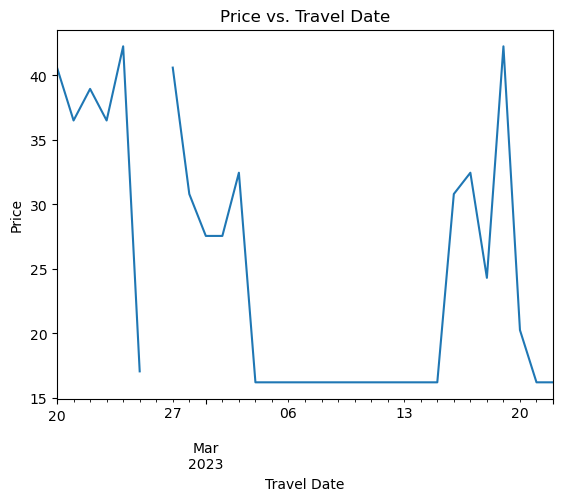

In [109]:
min_values_plot1 = min_values_hin_0_7.plot(kind='line', x='travel_date', y='0-7')
plt.xlim(df_loaded['travel_date'].min(), df_loaded['travel_date'].max())
plt.title('Price vs. Travel Date')
plt.xlabel('Travel Date')
plt.ylabel('Price')

plt

In [110]:
min_values_back_10_13 = min_values_back('10-13')
min_values_back_10_13

travel_date
2023-02-20    40.60
2023-02-21    38.95
2023-02-22    40.60
2023-02-23    30.80
2023-02-24    40.60
2023-02-25    42.25
2023-02-26    16.20
2023-02-27    40.60
2023-02-28    27.55
2023-03-01    30.80
2023-03-02    27.55
2023-03-03    40.60
2023-03-04    16.20
2023-03-05    16.20
2023-03-06    16.20
2023-03-07    16.20
2023-03-08    16.20
2023-03-09    16.20
2023-03-10    16.20
2023-03-11    16.20
2023-03-12    16.20
2023-03-13    16.20
2023-03-14    16.20
2023-03-15    16.20
2023-03-16    16.20
2023-03-17    16.20
2023-03-18    16.20
2023-03-19    16.20
2023-03-20    16.20
2023-03-21    16.20
2023-03-22    16.20
Name: 10-13, dtype: float64

<module 'matplotlib.pyplot' from '/home/lars/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

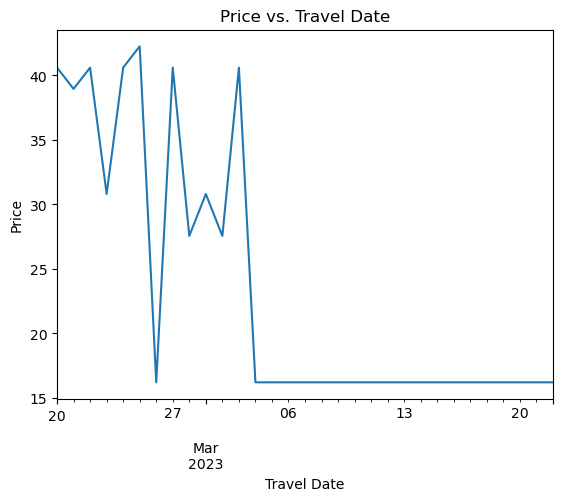

In [111]:
min_values_plot3 = min_values_back_10_13.plot(kind='line', x='travel_date', y='10-13')
plt.xlim(df_loaded['travel_date'].min(), df_loaded['travel_date'].max())
plt.title('Price vs. Travel Date')
plt.xlabel('Travel Date')
plt.ylabel('Price')

plt

In [112]:
slot0 = min_values_hin('0-7')
slot1 = min_values_hin('7-10')
slot2 = min_values_hin('10-13')
slot3 = min_values_hin('13-16')
slot4 = min_values_hin('16-19')
slot5 = min_values_hin('19-0')

slots_list = [slot0, slot1, slot2, slot3, slot4, slot5]

<module 'matplotlib.pyplot' from '/home/lars/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

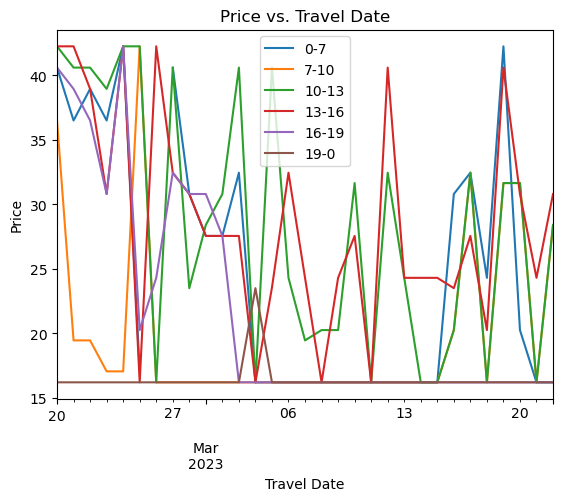

In [113]:
for slot in slots_list:
    slot.plot(kind='line', x='travel_date')

plt.xlim(df_loaded['travel_date'].min(), df_loaded['travel_date'].max())
plt.title('Price vs. Travel Date')
plt.xlabel('Travel Date')
plt.ylabel('Price')

plt.legend()

plt

In [114]:
slots_mean = []
for slot in slots_list:
    slots_mean.append(slot.mean())
df_slots_mean = pd.DataFrame(slots_mean)
df_slots_mean

,0
0,24.921667
1,20.004839
2,28.446774
3,28.803226
4,21.911290
5,16.435484


In [115]:
no_bc_df = df_loaded.query('bahn_card == 0')
bc25_df = df_loaded.query('bahn_card == 1')
no_bc_mean = no_bc_df.iloc[:, :6].mean()
bc25_mean =  bc25_df.iloc[:, :6].mean()

df_pct_diff = pd.concat([no_bc_mean, bc25_mean], axis=1)
bc_percent_advantage = df_pct_diff.pct_change(axis=1)
bc_percent_advantage

,0,1
0-7,NaN,-0.187895
7-10,NaN,-0.188245
10-13,NaN,-0.189111
13-16,NaN,-0.190621
16-19,NaN,-0.188764
19-0,NaN,-0.188388


In [116]:
bc_percent_advantage[1].mean()

-0.18883748744054363